In [1]:
#Importar librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importartar data set
data=pd.read_csv('vistara.csv')

In [3]:
data=data.drop(['Unnamed: 11'], axis=1)


In [4]:
data['dolares'] = data['price'] * 0.12

In [5]:
data.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dolares
0,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,16,1714,205.68
1,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,17,1714,205.68
2,Vistara,UK-897,Bangalore,Early_Morning,zero,Morning,Hyderabad,Economy,1.17,17,1714,205.68


In [6]:
#Información
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           127859 non-null  object 
 1   flight            127859 non-null  object 
 2   source_city       127859 non-null  object 
 3   departure_time    127859 non-null  object 
 4   stops             127859 non-null  object 
 5   arrival_time      127859 non-null  object 
 6   destination_city  127859 non-null  object 
 7   class             127859 non-null  object 
 8   duration          127859 non-null  float64
 9   days_left         127859 non-null  int64  
 10  price             127859 non-null  int64  
 11  dolares           127859 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 11.7+ MB


In [7]:
# columnas y filas
data.shape


(127859, 12)

In [8]:
#Variables dataset
data.describe()


,duration,days_left,price,dolares
count,127859.000000,127859.000000,127859.000000,127859.000000
mean,13.326634,25.894532,30396.536302,3647.584356
std,6.777230,13.638537,25637.159445,3076.459133
min,1.000000,1.000000,1714.000000,205.680000
25%,8.500000,14.000000,6412.000000,769.440000
50%,12.500000,26.000000,15543.000000,1865.160000
75%,17.000000,38.000000,55377.000000,6645.240000
max,47.080000,49.000000,123071.000000,14768.520000


In [9]:
#Buscar null
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dolares             0
dtype: int64

In [10]:
#Valor unico de cada variable
data.nunique()


airline                1
flight               133
source_city            6
departure_time         5
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             392
days_left             49
price               5303
dolares             5303
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Distribuciones Data
##########################

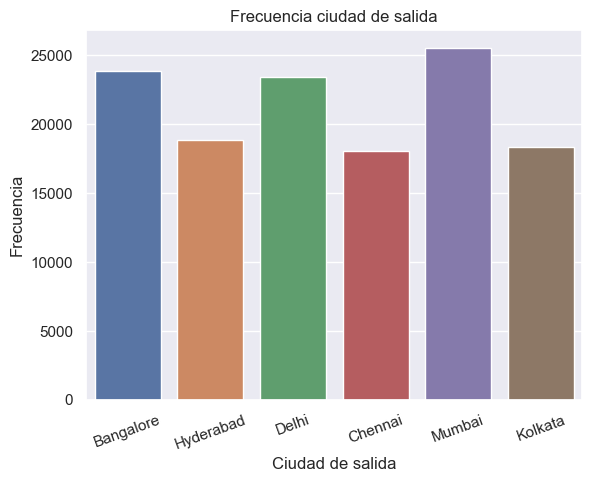

In [13]:
sns.countplot(data=data, x='source_city')
plt.xlabel('Ciudad de salida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de salida')
plt.xticks(rotation=20)
plt.show()

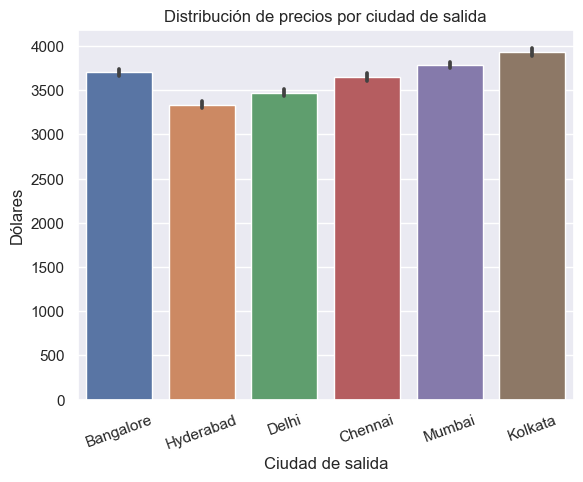

In [14]:
sns.barplot(data=data, x='source_city', y='dolares')
plt.xlabel('Ciudad de salida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de salida')
plt.xticks(rotation=20)
plt.show()



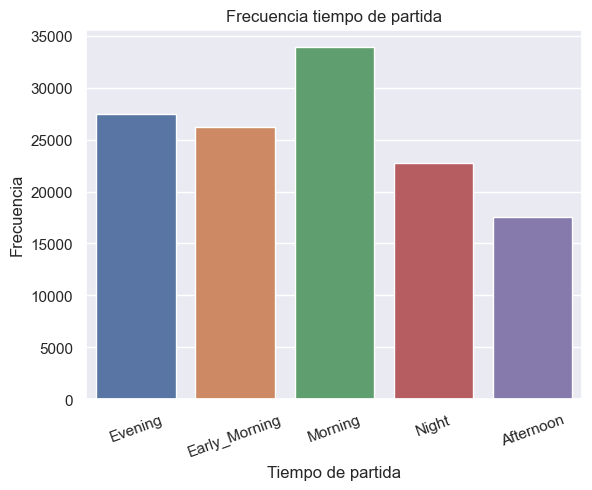

In [15]:
sns.countplot(data=data, x='departure_time')
plt.xlabel('Tiempo de partida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia tiempo de partida')
plt.xticks(rotation=20)
plt.show()

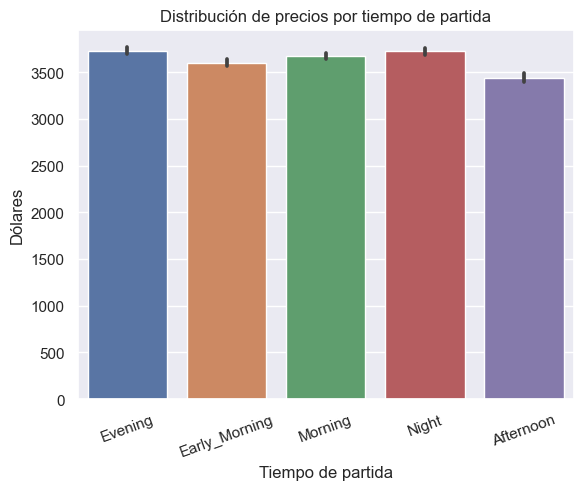

In [16]:
sns.barplot(data=data, x='departure_time', y='dolares')
plt.xlabel('Tiempo de partida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por tiempo de partida')
plt.xticks(rotation=20)
plt.show()

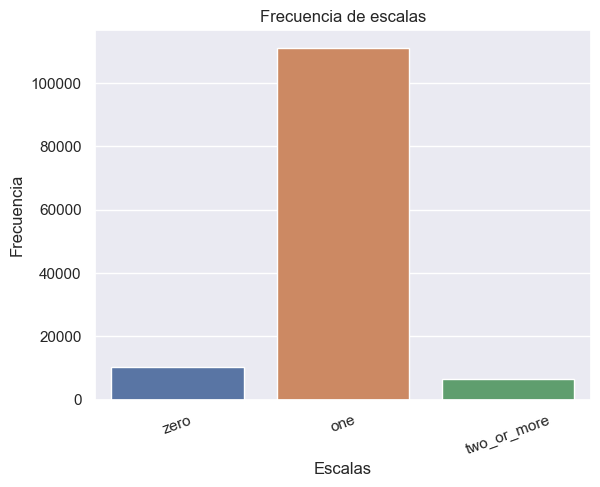

In [17]:
sns.countplot(data=data, x='stops')
plt.xlabel('Escalas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de escalas')
plt.xticks(rotation=20)
plt.show()

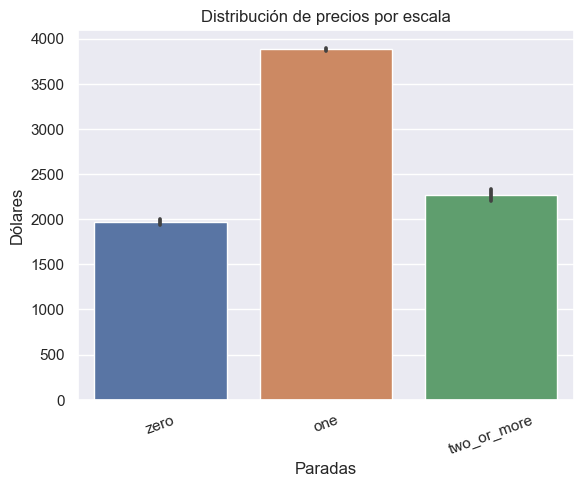

In [18]:
sns.barplot(data=data, x='stops', y='dolares')
plt.xlabel('Paradas')
plt.ylabel('Dólares')
plt.title('Distribución de precios por escala')
plt.xticks(rotation=20)
plt.show()

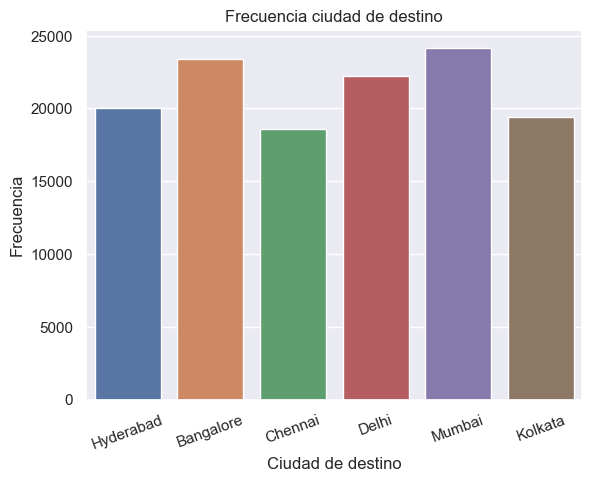

In [19]:
sns.countplot(data=data, x='destination_city')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

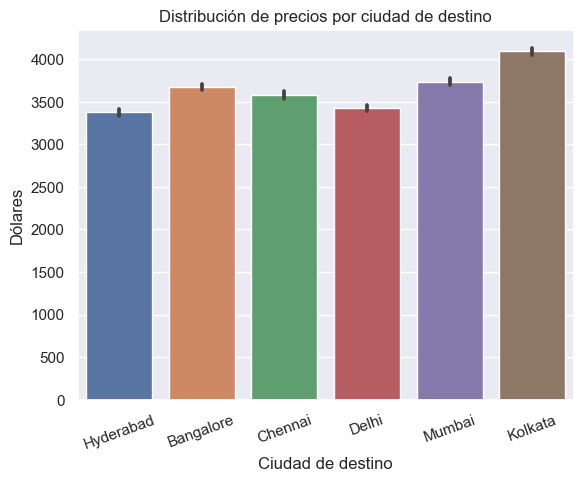

In [20]:
sns.barplot(data=data, x='destination_city', y='dolares')
plt.xlabel('Ciudad de destino')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de destino')
plt.xticks(rotation=20)
plt.show()

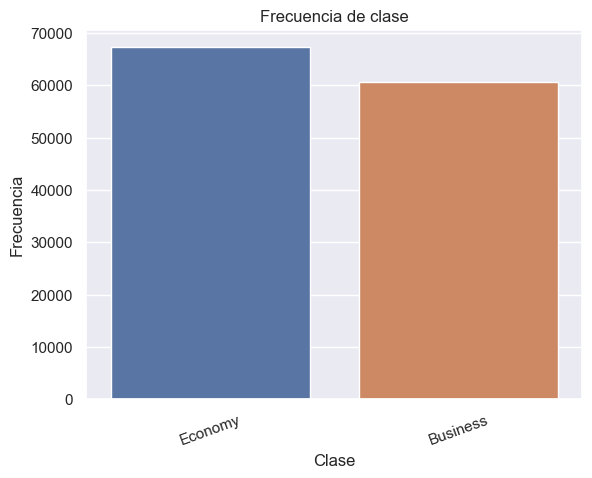

In [21]:
sns.countplot(data=data, x='class')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clase')
plt.xticks(rotation=20)
plt.show()

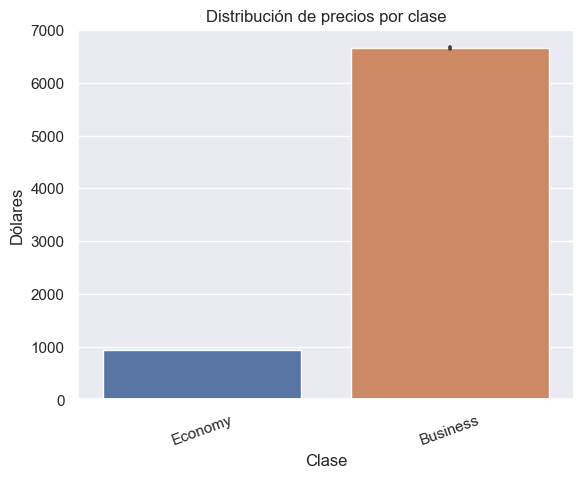

In [22]:
sns.barplot(data=data, x='class', y='dolares')
plt.xlabel('Clase')
plt.ylabel('Dólares')
plt.title('Distribución de precios por clase')
plt.xticks(rotation=20)
plt.show()

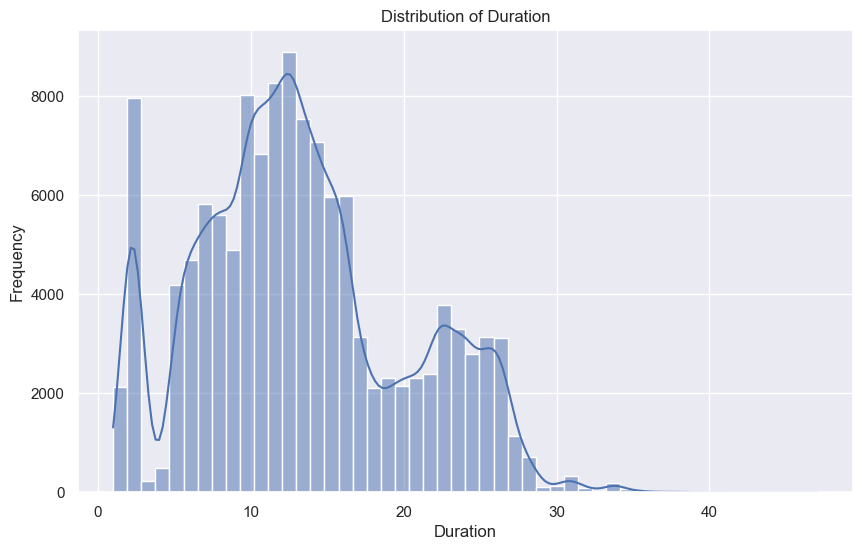

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', bins=50, kde=True)  # Ajusta el número de bins según tus necesidades
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

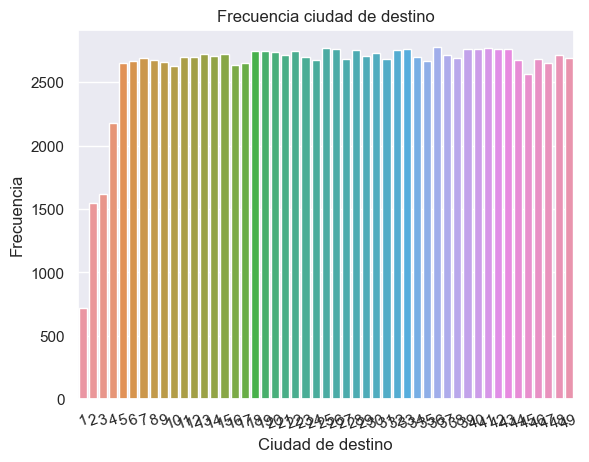

In [24]:
sns.countplot(data=data, x='days_left')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

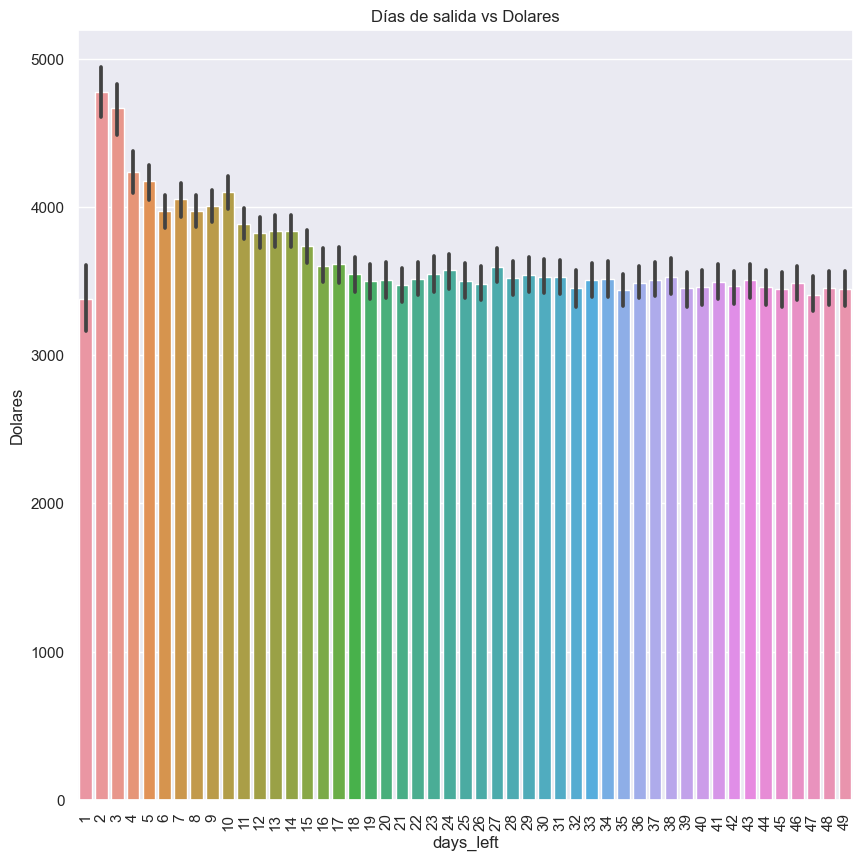

In [25]:
df=sns.set(font_scale=1)
df=plt.figure(figsize=(10, 10)) 
df=sns.barplot(data=data, x='days_left', y='dolares')
df=plt.xlabel('days_left')
df=plt.ylabel('Dolares')
df=plt.title('Días de salida vs Dolares')
df=plt.xticks(rotation=90)
df=plt.show()

In [26]:
#Diagramas de cajas
##########################

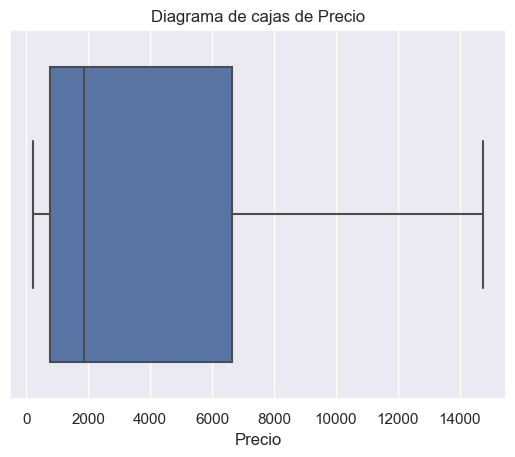

In [27]:
#precio
sns.boxplot(x=data['dolares'])
plt.xlabel('Precio')
plt.title('Diagrama de cajas de Precio')
plt.show()

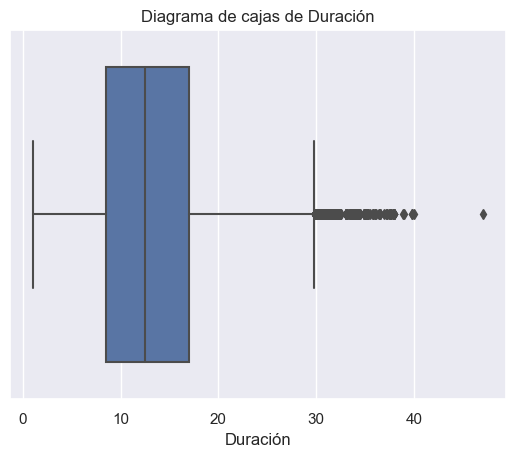

In [28]:
#Duración
sns.boxplot(x=data['duration'])
plt.xlabel('Duración')
plt.title('Diagrama de cajas de Duración')
plt.show()

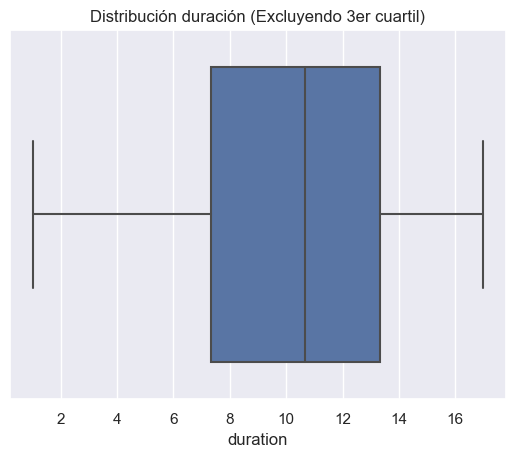

In [29]:
#Calcular el 3er cuartil
tercer_cuartil = data['duration'].quantile(0.75)

# Filtrar los valores que son menores o iguales al tercer cuartil
data_filtrada = data[data['duration'] <= tercer_cuartil]

# Generar el boxplot con los valores filtrados
sns.boxplot(x=data_filtrada['duration'])
plt.xlabel('duration')
plt.title('Distribución duración (Excluyendo 3er cuartil)')
plt.show()

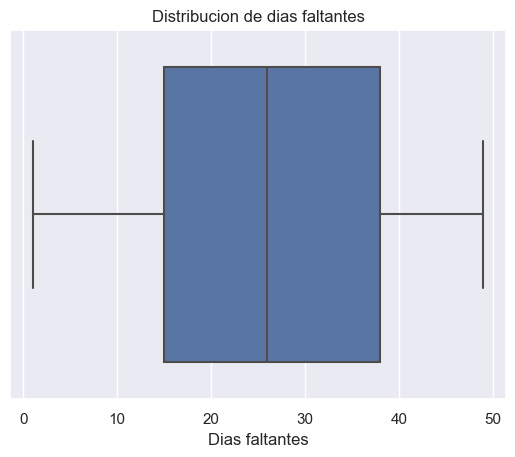

In [30]:
#Dias faltantes
sns.boxplot(x=data_filtrada['days_left'])
plt.xlabel('Dias faltantes')
plt.title('Distribucion de dias faltantes')
plt.show()

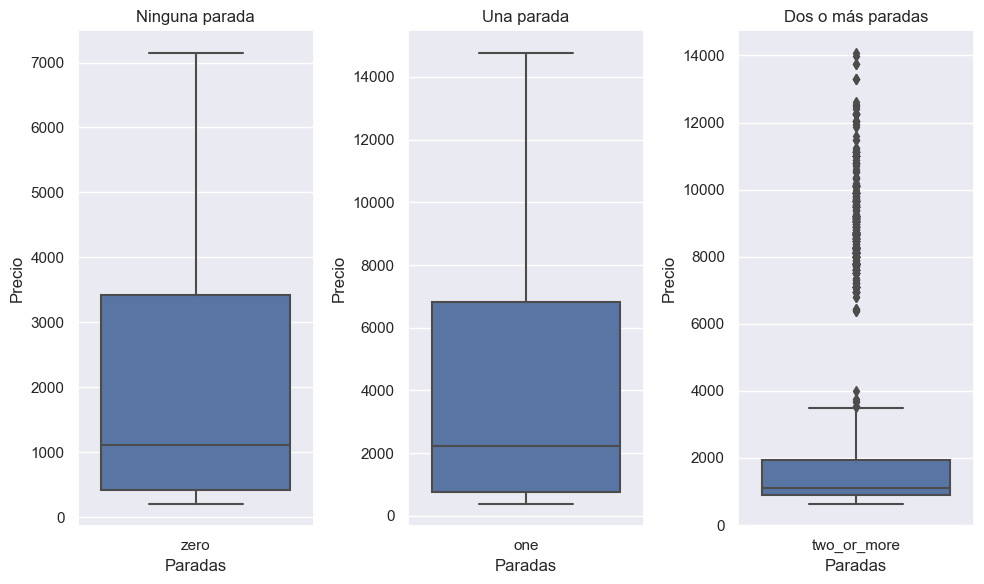

In [32]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'zero'
plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

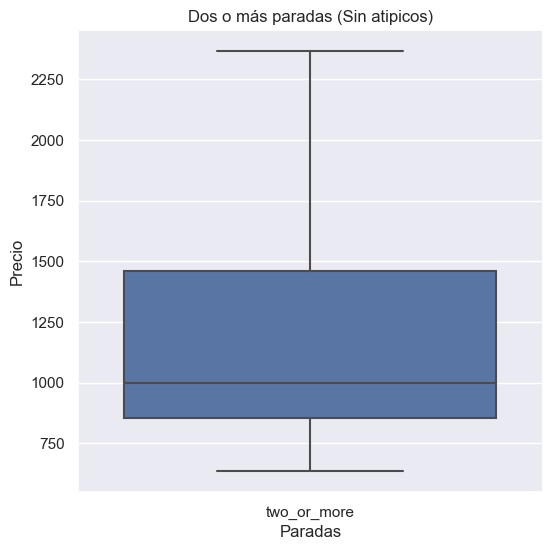

In [33]:

data_filtered = data[data['stops'] == 'two_or_more']

# Calcula el rango intercuartílico (IQR) para la variable 'price'
Q1 = data_filtered['dolares'].quantile(0.25)
Q3 = data_filtered['dolares'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los valores atípicos
lower_bound = Q1 - 0.4 * IQR
upper_bound = Q3 + 0.4 * IQR

# Filtra los valores que no son atípicos
data_filtrada = data_filtered[(data_filtered['dolares'] >= lower_bound) & (data_filtered['dolares'] <= upper_bound)]

# Crea el boxplot para 'two_or_more' sin valores atípicos
plt.figure(figsize=(6, 6))
sns.boxplot(x='stops', y='dolares', data=data_filtrada)
plt.title('Dos o más paradas (Sin atipicos)')
plt.xlabel('Paradas')
plt.ylabel('Precio')
plt.show()

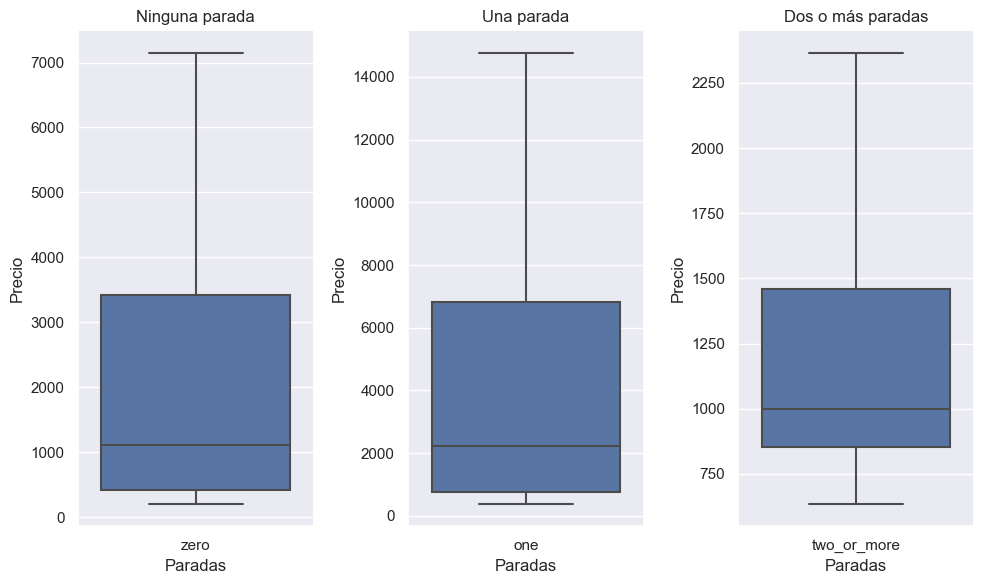

In [34]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data_filtrada[data_filtrada['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

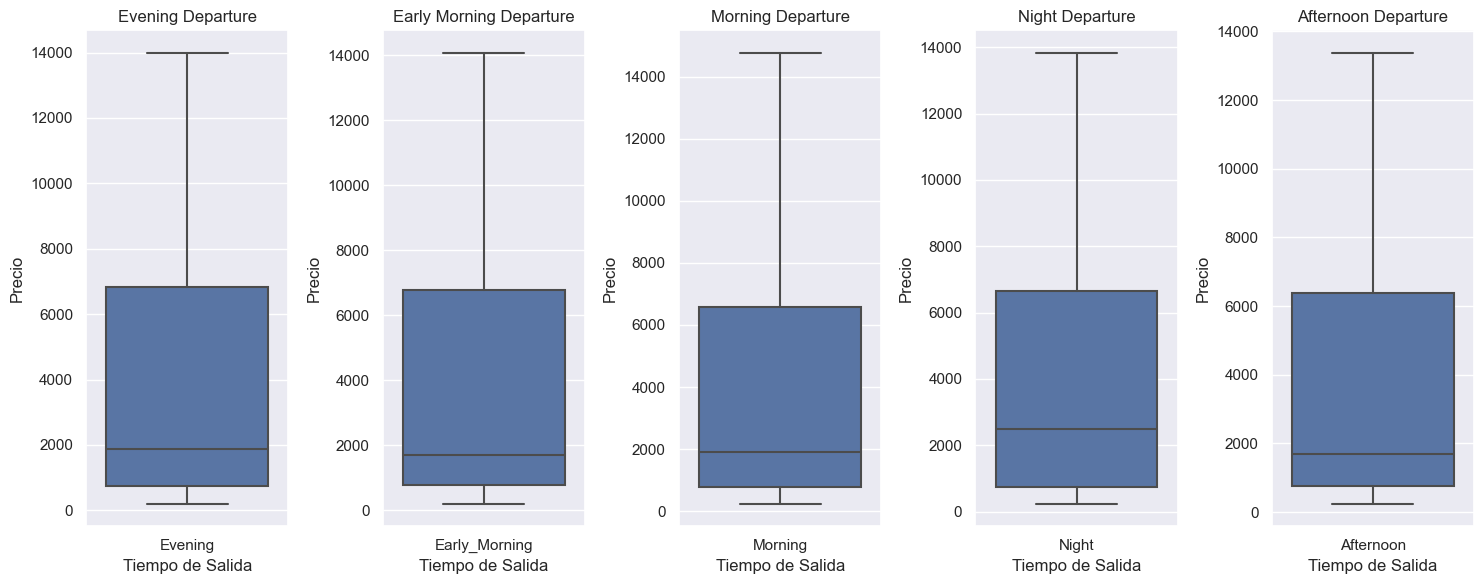

In [35]:
plt.figure(figsize=(15, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Evening'
plt.subplot(1, 5, 1)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Evening'])
plt.title('Evening Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Early_morning'
plt.subplot(1, 5, 2)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Early_Morning'])
plt.title('Early Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Morning'
plt.subplot(1, 5, 3)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Morning'])
plt.title('Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Night'
plt.subplot(1, 5, 4)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Night'])
plt.title('Night Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Afternoon'
plt.subplot(1, 5, 5)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Afternoon'])
plt.title('Afternoon Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

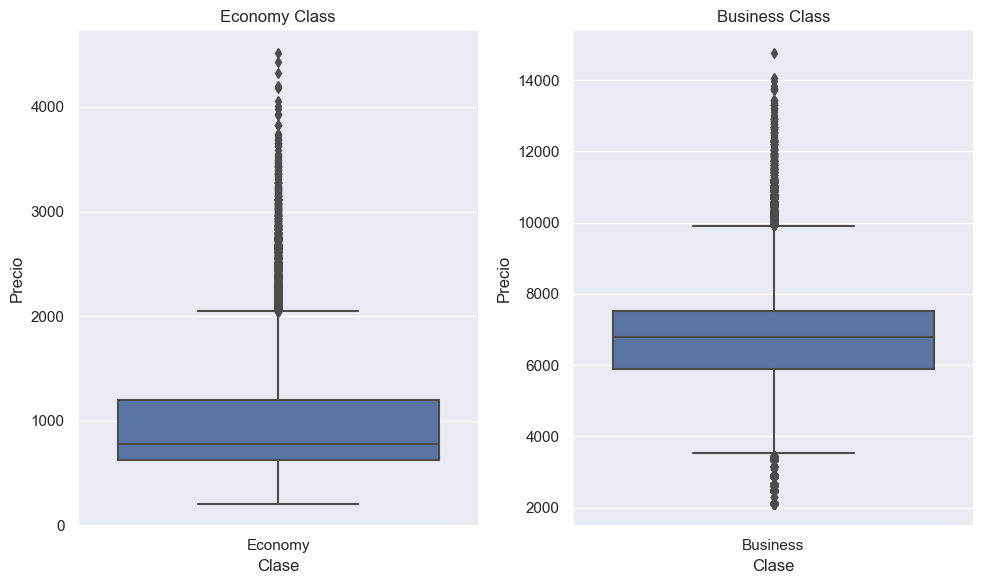

In [36]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Economy'
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Economy'])
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Boxplot para 'Business'
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Business'])
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

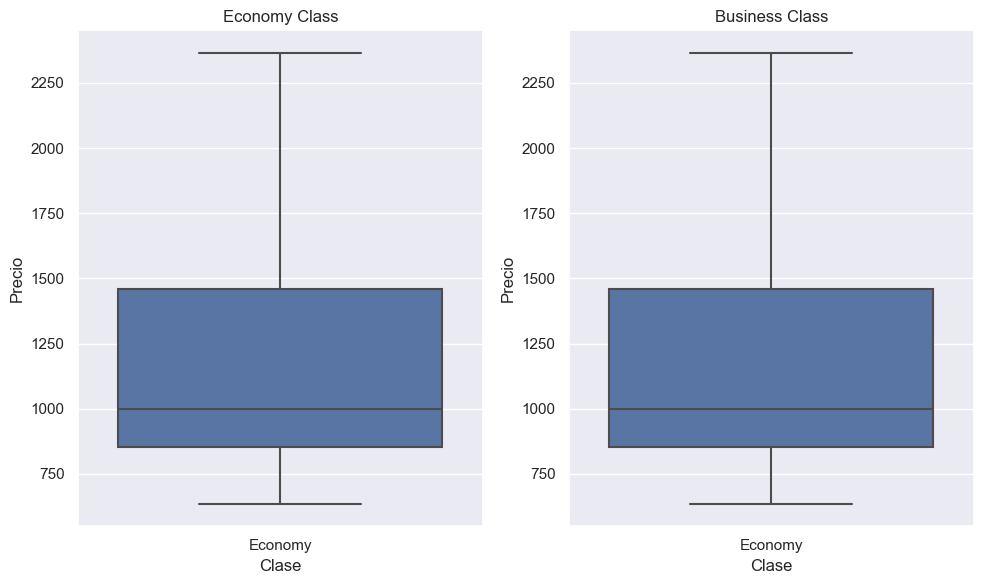

In [37]:
# Función para eliminar valores atípicos según el método del rango intercuartílico (IQR)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtrar los datos por cada categoría y crea los boxplots separados
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Filtrar los datos eliminando valores atípicos para 'Economy'
data_economy = remove_outliers(data[data['class'] == 'Economy'], 'dolares')
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Filtrar los datos eliminando valores atípicos para 'Business'
data_business = remove_outliers(data[data['class'] == 'Business'], 'dolares')
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajustar el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

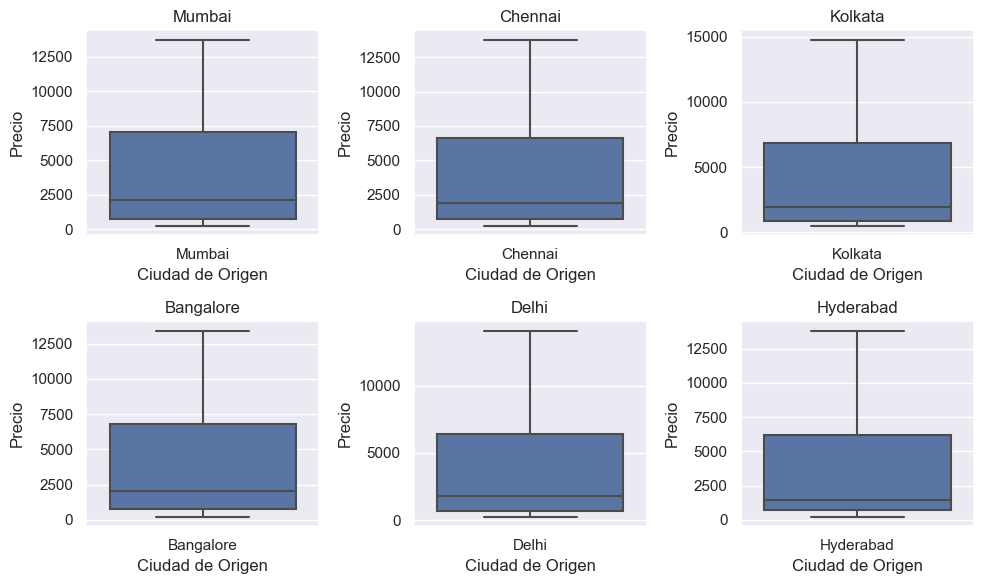

In [38]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

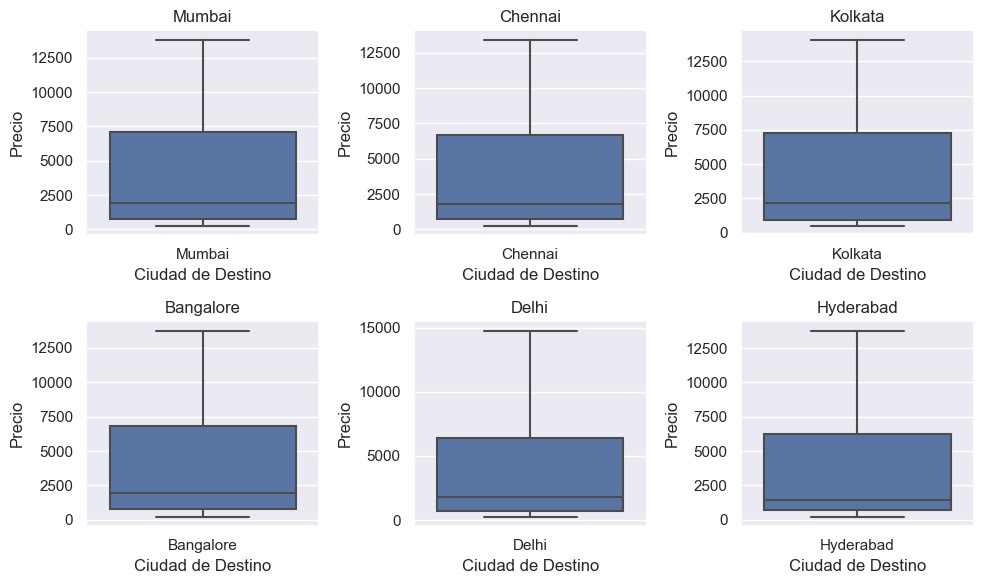

In [39]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

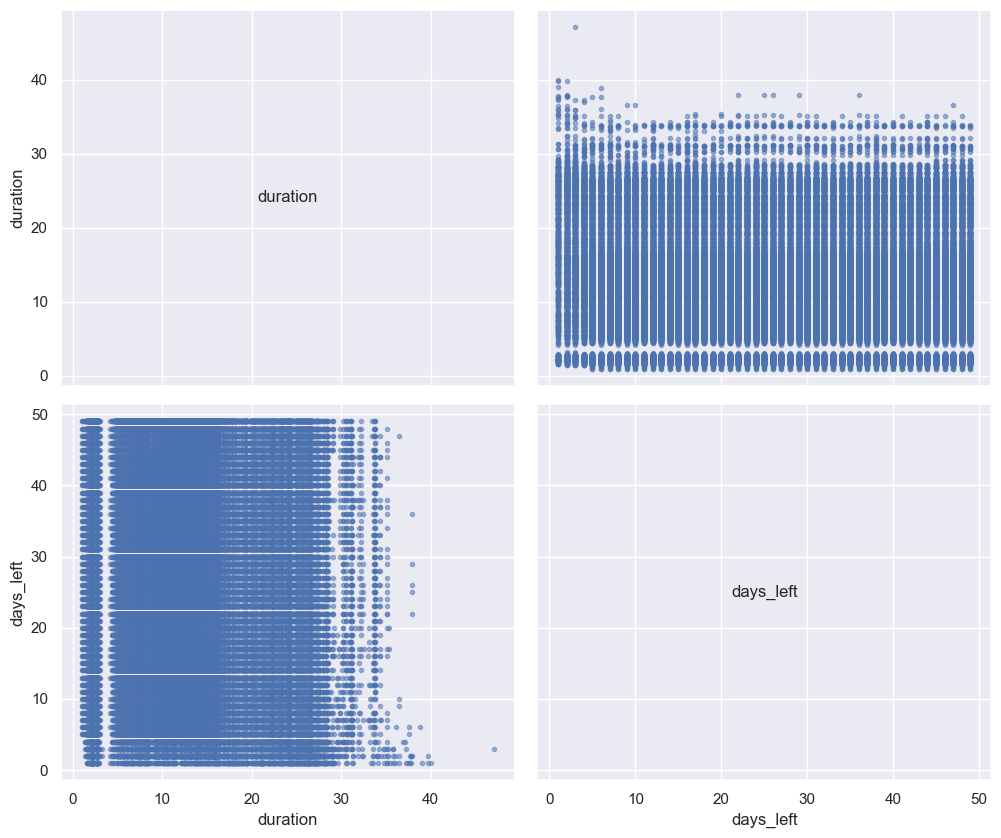

In [40]:
# Variables de interés
variables = ["duration","days_left"]

# Calcular la matriz de correlación
correlation_matrix = data_filtrada[variables].corr()

# Crear un gráfico de matriz de dispersión con nombres de variables en la diagonal
n = len(variables)

fig, axes = plt.subplots(n, n, figsize=(12, 10), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for i in range(n):
    for j in range(n):
        if i == j:
            axes[i, j].annotate(variables[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=12)
        else:
            axes[i, j].scatter(data[variables[j]], data[variables[i]], marker='.', alpha=0.5)
            
# Ajustar la apariencia de los ejes
for i in range(n):
    axes[n-1, i].set_xlabel(variables[i])
    axes[i, 0].set_ylabel(variables[i])

plt.show()

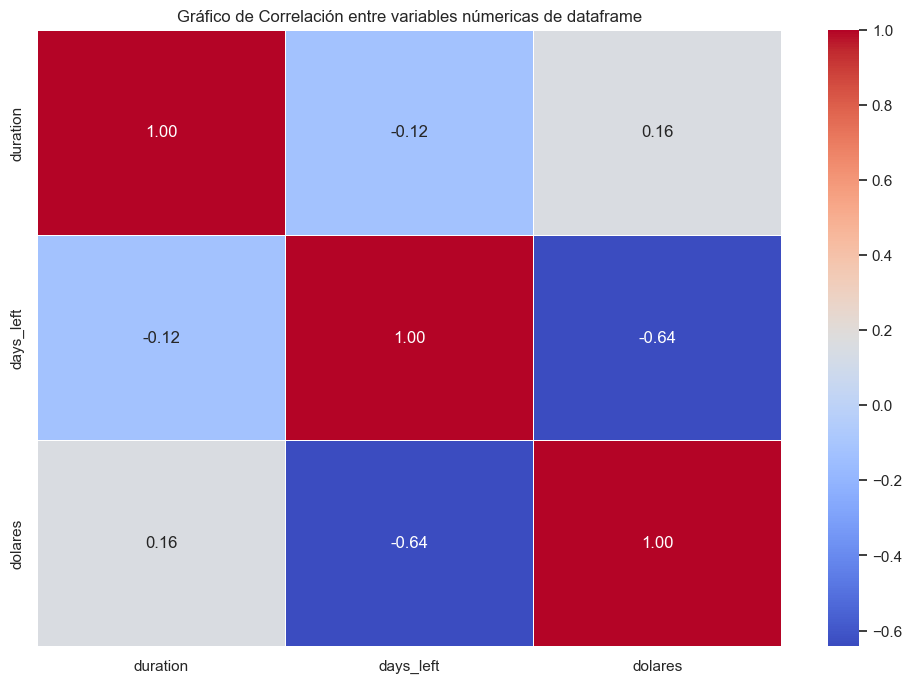

In [41]:
variables_numericas= ["duration","days_left","dolares"]

matriz_correlacion=data_filtrada[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

In [46]:
df = pd.get_dummies(data_filtrada, columns=['class'], drop_first=True)

In [47]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,dolares
17708,Vistara,UK-836,Chennai,Morning,two_or_more,Evening,Bangalore,8.75,19,5294,635.28
17709,Vistara,UK-836,Chennai,Morning,two_or_more,Evening,Bangalore,8.75,20,5294,635.28
17710,Vistara,UK-836,Chennai,Morning,two_or_more,Evening,Bangalore,8.75,21,5294,635.28
17711,Vistara,UK-836,Chennai,Morning,two_or_more,Evening,Bangalore,8.75,22,5294,635.28
17712,Vistara,UK-836,Chennai,Morning,two_or_more,Evening,Bangalore,8.75,26,5294,635.28
...,...,...,...,...,...,...,...,...,...,...,...
66648,Vistara,UK-852,Mumbai,Afternoon,two_or_more,Night,Chennai,8.08,15,19636,2356.32
66659,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Night,Kolkata,13.83,2,19670,2360.40
66660,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Morning,Kolkata,26.67,2,19670,2360.40
66661,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Night,Kolkata,37.83,2,19670,2360.40


In [56]:
df = pd.get_dummies(data_filtrada, columns=['stops',"class"], drop_first=False)

In [57]:
df

,airline,flight,source_city,departure_time,arrival_time,destination_city,duration,days_left,price,dolares,stops_two_or_more,class_Economy
17708,Vistara,UK-836,Chennai,Morning,Evening,Bangalore,8.75,19,5294,635.28,True,True
17709,Vistara,UK-836,Chennai,Morning,Evening,Bangalore,8.75,20,5294,635.28,True,True
17710,Vistara,UK-836,Chennai,Morning,Evening,Bangalore,8.75,21,5294,635.28,True,True
17711,Vistara,UK-836,Chennai,Morning,Evening,Bangalore,8.75,22,5294,635.28,True,True
17712,Vistara,UK-836,Chennai,Morning,Evening,Bangalore,8.75,26,5294,635.28,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
66648,Vistara,UK-852,Mumbai,Afternoon,Night,Chennai,8.08,15,19636,2356.32,True,True
66659,Vistara,UK-832,Chennai,Early_Morning,Night,Kolkata,13.83,2,19670,2360.40,True,True
66660,Vistara,UK-832,Chennai,Early_Morning,Morning,Kolkata,26.67,2,19670,2360.40,True,True
66661,Vistara,UK-832,Chennai,Early_Morning,Night,Kolkata,37.83,2,19670,2360.40,True,True


In [42]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
